# Cost Analysis for Different Architectures of ICs

In [232]:
import numpy as np
import matplotlib.pyplot as plt

In [262]:
x = np.linspace(1, 60000, 60000)

In [263]:
f1 = (20000 + 20*x)/x
f2 = (10000 + 40*x)/x
f3 = (100000 + 4*x)/x
f4 = (200000 + 2*x)/x
list_of_funcs = [f1, f2, f3, f4]
crayons = ['red', 'blue', 'purple', 'black']
labels = ['ICs', 'FPGA', 'SoC-1', 'SoC-2 ']

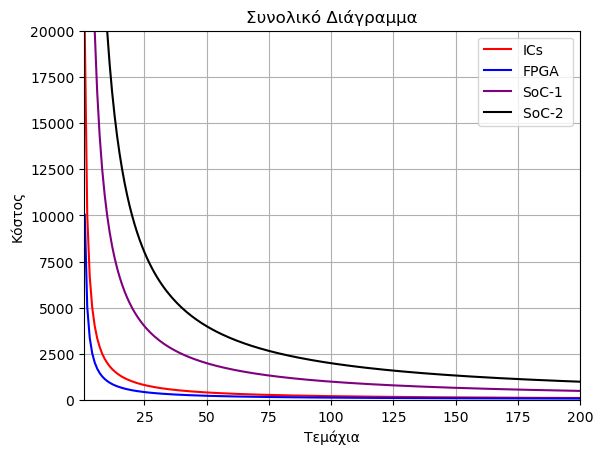

In [295]:
for i, f in enumerate(list_of_funcs):
    plt.plot(x, f, color = crayons[i], label = labels[i])
plt.xlim((0.76, 200))
plt.ylim((0, 20000))
plt.xlabel('Τεμάχια')
plt.ylabel('Κόστος')
plt.title('Συνολικό Διάγραμμα')
plt.grid()
plt.legend();

In [265]:
titles = ['Σημείο Τομής F1, F2', 'Σημείο Τομής F1, F3', 'Σημείο Τομής F1, F4']
intersection = [np.where(f1 == f2)[0][0] + 1, np.where(f1 == f3)[0][0] + 1, np.where(f1 == f4)[0][0] + 1]
graph_y_values = [60, 25, 20]
bias = [100, 400, 600]

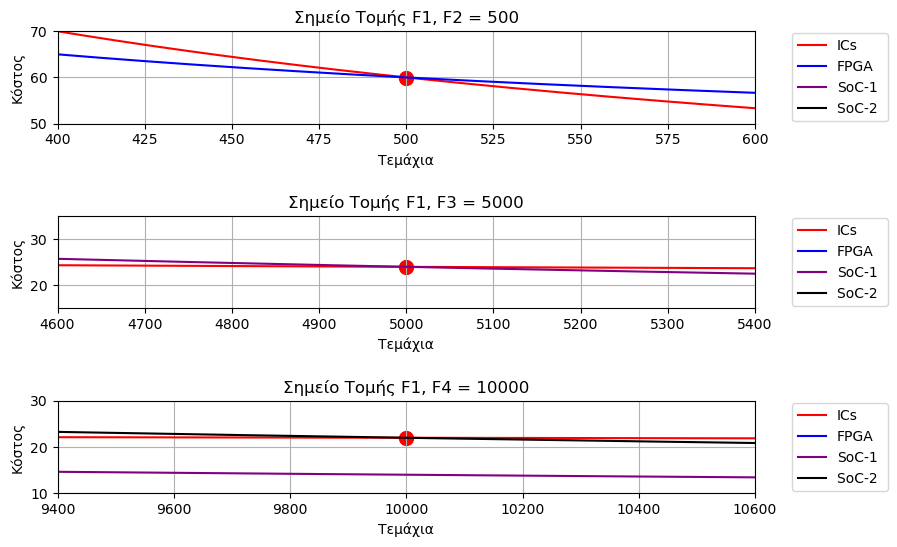

In [266]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (9, 6))

for j, ax in enumerate(axes):
    for i, f in enumerate(list_of_funcs):
        ax.plot(x, f, color = crayons[i], label = labels[i])
    ax.set_xlim((intersection[j] - bias[j], intersection[j] + bias[j]))
    ax.set_ylim((graph_y_values[j] - 10, graph_y_values[j] + 10))
    ax.set_xlabel('Τεμάχια')
    ax.set_ylabel('Κόστος')
    ax.grid()
    ax.set_title(f'{titles[j]} = {intersection[j]}')
    ax.legend(loc = 'center right', bbox_to_anchor=(1.2, 0.5));
    ax.scatter(intersection[j], f1[intersection[j]], marker='o', color='red', s=100)
fig.subplots_adjust(hspace=1)

In [267]:
titles = ['Σημείο Τομής F2, F1', 'Σημείο Τομής F2, F3', 'Σημείο Τομής F2, F4']
intersection = [np.where(f1 == f2)[0][0] + 1, np.where(f2 == f3)[0][0] + 1, np.where(f2 == f4)[0][0] + 1]
graph_y_values = [60, 45, 43]
bias = [100, 400, 600]

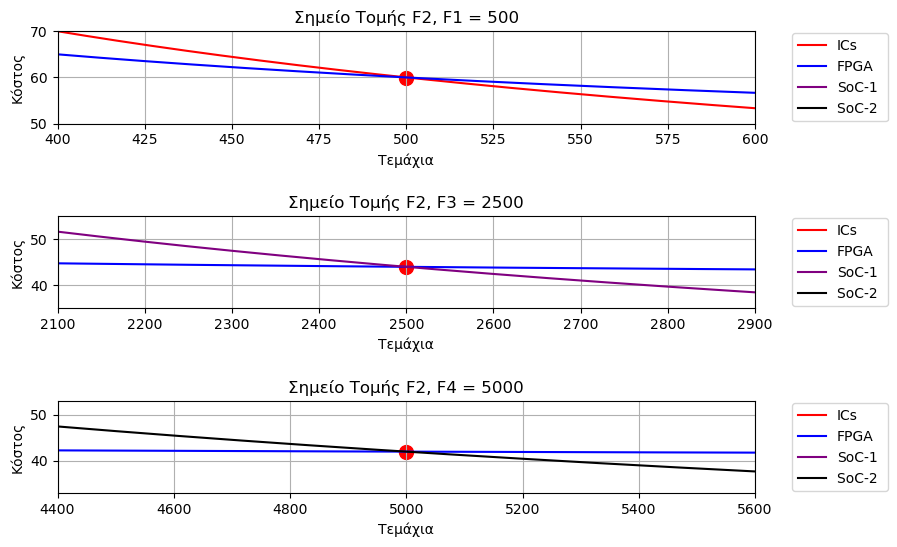

In [268]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (9, 6))

for j, ax in enumerate(axes):
    for i, f in enumerate(list_of_funcs):
        ax.plot(x, f, color = crayons[i], label = labels[i])
    ax.set_xlim((intersection[j] - bias[j], intersection[j] + bias[j]))
    ax.set_ylim((graph_y_values[j] - 10, graph_y_values[j] + 10))
    ax.set_xlabel('Τεμάχια')
    ax.set_ylabel('Κόστος')
    ax.grid()
    ax.set_title(f'{titles[j]} = {intersection[j]}')
    ax.legend(loc = 'center right', bbox_to_anchor=(1.2, 0.5));
    ax.scatter(intersection[j], f2[intersection[j]], marker='o', color='red', s=100)
fig.subplots_adjust(hspace=1)

In [293]:
titles = ['Σημείο Τομής F4, F1', 'Σημείο Τομής F4, F2', 'Σημείο Τομής F4, F3']
intersection = [np.where(f1 == f4)[0][0] + 1, np.where(f2 == f4)[0][0] + 1, np.where(f3 == f4)[0][0] + 1]
graph_y_values = [20, 45, 7]
bias = [2000, 400, 10000]

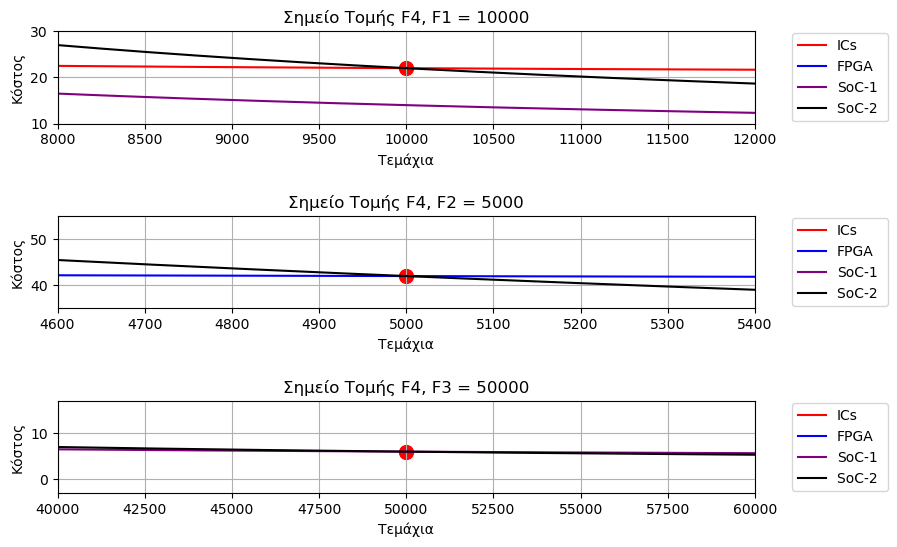

In [294]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (9, 6))

for j, ax in enumerate(axes):
    for i, f in enumerate(list_of_funcs):
        ax.plot(x, f, color = crayons[i], label = labels[i])
    ax.set_xlim((intersection[j] - bias[j], intersection[j] + bias[j]))
    ax.set_ylim((graph_y_values[j] - 10, graph_y_values[j] + 10))
    ax.set_xlabel('Τεμάχια')
    ax.set_ylabel('Κόστος')
    ax.grid()
    ax.set_title(f'{titles[j]} = {intersection[j]}')
    ax.legend(loc = 'center right', bbox_to_anchor=(1.2, 0.5));
    ax.scatter(intersection[j], f4[intersection[j]], marker='o', color='red', s=100)
fig.subplots_adjust(hspace=1)

In [313]:
closed_set_f1 = [np.where((f1 < f2) & (f1 < f3) & (f1 < f4))[0][0], np.where((f1 < f2) & (f1 < f3) & (f1 < f4))[0][-1]]
closed_set_f2 = [np.where((f2 < f1) & (f2 < f3) & (f2 < f4))[0][0], np.where((f2 < f1) & (f2 < f3) & (f2 < f4))[0][-1]]
closed_set_f3 = [np.where((f3 < f2) & (f3 < f1) & (f3 < f4))[0][0], np.where((f3 < f2) & (f3 < f1) & (f3 < f4))[0][-1]]
closed_set_f4 = [np.where((f4 < f2) & (f4 < f3) & (f4 < f1))[0][0], np.where((f4 < f2) & (f4 < f3) & (f4 < f1))[0][-1]]

In [314]:
closed_set_f1

[500, 4998]

In [315]:
closed_set_f2

[0, 498]

In [316]:
closed_set_f3

[5000, 49998]

In [317]:
closed_set_f4

[50000, 59999]

In [339]:
f_list = []
closed_set = []
k = [x for x in range(31)]
for i,j in enumerate(k):
    f = (10000 + (10+j)*x)/x
    closed_set.append([np.where((f < f1) & (f < f3) & (f < f4))[0][0], np.where((f < f1) & (f < f3) & (f < f4))[0][-1]])
    print(f'for k = {j}, the closed set where f2 is below all other functions is = {closed_set[i]}')

for k = 0, the closed set where f2 is below all other functions is = [0, 14998]
for k = 1, the closed set where f2 is below all other functions is = [0, 12856]
for k = 2, the closed set where f2 is below all other functions is = [0, 11248]
for k = 3, the closed set where f2 is below all other functions is = [0, 9998]
for k = 4, the closed set where f2 is below all other functions is = [0, 8998]
for k = 5, the closed set where f2 is below all other functions is = [0, 8180]
for k = 6, the closed set where f2 is below all other functions is = [0, 7498]
for k = 7, the closed set where f2 is below all other functions is = [0, 6922]
for k = 8, the closed set where f2 is below all other functions is = [0, 6427]
for k = 9, the closed set where f2 is below all other functions is = [0, 5998]
for k = 10, the closed set where f2 is below all other functions is = [0, 5623]
for k = 11, the closed set where f2 is below all other functions is = [0, 5293]
for k = 12, the closed set where f2 is below al